# Data Analytics: Evaluating Techniques for Wifi Locationing

## Autor: Javier Orcoyen

### Marzo 2022

# Importar librerías

In [1]:
# Visualización y análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Análisis de modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import sqrt

# Clasificación
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Leer el dataset

In [2]:
# Guarda los datos del fichero CSV en una variable de tipo "dataframe"
df_train = pd.read_csv('UJIndoorLoc/trainingData.csv')
df_test = pd.read_csv('UJIndoorLoc/validationData.csv')

# Ánalisis preliminar de los datos

### Descripción de los datos

In [3]:
# Muestra las primeras 5 filas del dataset de train
df_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
# Muestra las primeras 5 filas del dataset de test
df_test.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [5]:
# Dimensiones del dataset de train
df_train.shape

(19937, 529)

In [6]:
# Dimensiones del dataset de test
df_test.shape

(1111, 529)

In [7]:
# Muestra el nombre de las columnas del dataset de train
df_train.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [8]:
# Muestra el nombre de las columnas del dataset de test
df_test.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [9]:
# Información sobre el dataset de train, comprobamos que hay 19.937 registros y que todas las variables son de tipo númérico
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [10]:
# Información sobre el dataset de test, comprobamos que hay 1.111 registros y que todas las variables son de tipo númérico
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 4.5 MB


In [11]:
# Más información acerca del dataset de train, con esto comprobamos, entre otros, valores mínimos y máximos de cada variable
df_train.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [12]:
# Más información acerca del dataset de test, con esto comprobamos, entre otros, valores mínimos y máximos de cada variable
df_test.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,1111.000000,1111.0,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1.111000e+03
mean,98.627363,100.0,99.665167,99.665167,100.0,100.0,100.0,94.297030,90.655266,98.811881,...,99.843384,-7529.197448,4.864902e+06,1.571557,0.758776,0.0,0.0,0.0,11.923492,1.380604e+09
std,16.127245,0.0,7.888265,7.888607,0.0,0.0,0.0,32.148809,39.886991,14.931667,...,5.220261,120.209336,7.027280e+01,1.001828,0.816139,0.0,0.0,0.0,6.556236,5.003222e+05
min,-94.000000,100.0,-87.000000,-88.000000,100.0,100.0,100.0,-99.000000,-96.000000,-98.000000,...,-74.000000,-7695.938755,4.864748e+06,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.379578e+09
25%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7637.423800,4.864843e+06,1.000000,0.000000,0.0,0.0,0.0,9.000000,1.380189e+09
50%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7560.376300,4.864915e+06,1.000000,1.000000,0.0,0.0,0.0,13.000000,1.380873e+09
75%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7420.539659,4.864967e+06,2.000000,1.000000,0.0,0.0,0.0,15.000000,1.380875e+09
max,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7299.786517,4.865017e+06,4.000000,2.000000,0.0,0.0,0.0,21.000000,1.381248e+09


### Análisis de duplicados

In [13]:
# En cuanto a eliminar duplicados, identificamos las filas duplicadas en el dataset de train
duplicatedRowsDF = df_train[df_train.duplicated()]

# De 19.937 registros, hay 637 duplicados
len(duplicatedRowsDF)

637

In [14]:
# Elimina duplicados y resetea el índice
df_train = df_train.drop_duplicates()
df_train.reset_index(drop=True, inplace=True)

In [15]:
# En cuanto a filas duplicadas en el dataset de test
duplicatedRowsDF = df_test[df_test.duplicated()]

# De 1.111 registros, no hay duplicados
len(duplicatedRowsDF)

0

### Análisis de valores nulos

In [16]:
# En cuanto a valores nulos, imprimimos por pantalla la suma y el resultado es 0, por lo que continuamos con el análisis
print(sum(df_train.isnull().sum()))

0


In [17]:
# En cuanto a valores nulos, imprimimos por pantalla la suma y el resultado es 0, por lo que continuamos con el análisis
print(sum(df_test.isnull().sum()))

0


# Análisis de variables

### Análisis de la variable 'LONGITUDE'

In [18]:
# Comprobamos los valores únicos de la columna en el dataset de train para confirmar que la información es coherente  
df_train['LONGITUDE'].unique()

array([-7541.2643    , -7536.6212    , -7519.1524    , -7524.5704    ,
       -7632.1436    , -7533.8962    , -7527.4511    , -7559.4973    ,
       -7510.43717322, -7528.81640155, -7523.6282    , -7571.0934    ,
       -7559.782     , -7562.1862    , -7564.1963    , -7555.1323    ,
       -7520.7245    , -7521.86718645, -7537.3399    , -7526.71092676,
       -7516.0888    , -7512.60416363, -7520.7558    , -7516.8415    ,
       -7502.4497    , -7489.1775    , -7482.45617603, -7491.03063395,
       -7501.2219    , -7480.1241    , -7506.7319    , -7502.8269    ,
       -7511.7367    , -7516.4745    , -7504.8814    , -7474.6526    ,
       -7506.5293    , -7511.5215    , -7470.5187    , -7469.7391    ,
       -7457.2421    , -7480.43149176, -7474.5825    , -7466.29110009,
       -7458.2642    , -7331.748     , -7331.4005    , -7461.52404926,
       -7327.49216509, -7336.7004    , -7337.3948    , -7340.5246    ,
       -7341.215     , -7339.15388718, -7337.23213905, -7344.9684    ,
      

In [19]:
# Comprobamos los valores únicos de la columna en el dataset de test para confirmar que la información es coherente
df_test['LONGITUDE'].unique()

array([-7515.9167994 , -7383.86722098, -7374.30207994, ...,
       -7637.53579816, -7636.65400505, -7637.94412   ])

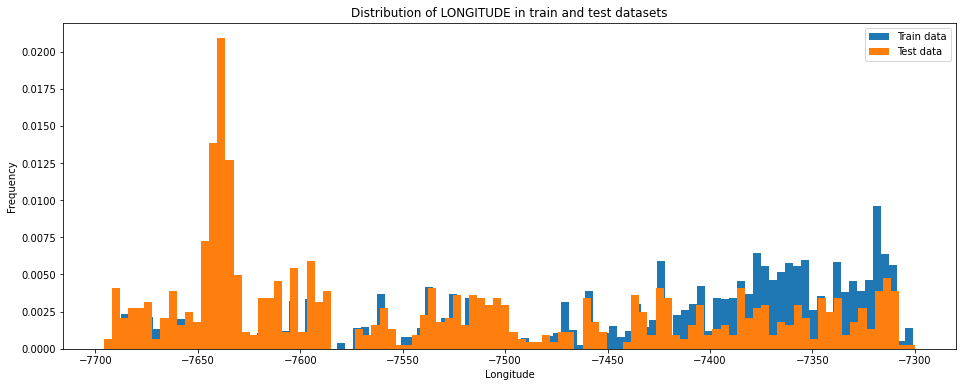

In [20]:
# Distribución de los valores de "LONGITUDE"
plt.figure(figsize=(16, 6))
plt.hist(df_train['LONGITUDE'], density=True, stacked=True, label="Train data", bins=100)
plt.hist(df_test['LONGITUDE'], density=True, stacked=True, label="Test data", bins=100)
plt.gca().set(title="Distribution of LONGITUDE in train and test datasets", xlabel="Longitude", ylabel="Frequency")
plt.legend()

### Análisis de la variable 'LATITUDE'

In [21]:
# Comprobamos los valores únicos de la columna en el dataset de train para confirmar que la información es coherente   
df_train['LATITUDE'].unique()

array([4864920.7782    , 4864934.2252    , 4864949.5322    ,
       4864934.093     , 4864982.2171    , 4864939.2583    ,
       4864929.1464    , 4864887.6504    , 4864949.25141671,
       4864959.43061222, 4864951.9583    , 4864871.7184    ,
       4864871.3735    , 4864866.7851    , 4864887.1932    ,
       4864885.2515    , 4864892.4384    , 4864889.47709399,
       4864895.7854    , 4864892.80180848, 4864889.8782    ,
       4864884.949544  , 4864891.4821    , 4864889.291     ,
       4864884.1761    , 4864899.9449    , 4864901.42957994,
       4864865.38593483, 4864863.0729    , 4864894.9306    ,
       4864850.684     , 4864860.1746    , 4864841.6472    ,
       4864844.5972    , 4864865.5295    , 4864865.9525    ,
       4864862.5543    , 4864853.5402    , 4864863.6628    ,
       4864864.2915    , 4864853.9303    , 4864867.13092805,
       4864866.8723    , 4864859.33894889, 4864852.0843    ,
       4864767.318     , 4864768.4786    , 4864852.0464766 ,
       4864766.66853056,

In [22]:
# Comprobamos los valores únicos de la columna en el dataset de test para confirmar que la información es coherente   
df_test['LATITUDE'].unique()

array([4864889.66291669, 4864839.74030718, 4864846.5337223 , ...,
       4864903.22942466, 4864904.935863  , 4864903.53590001])

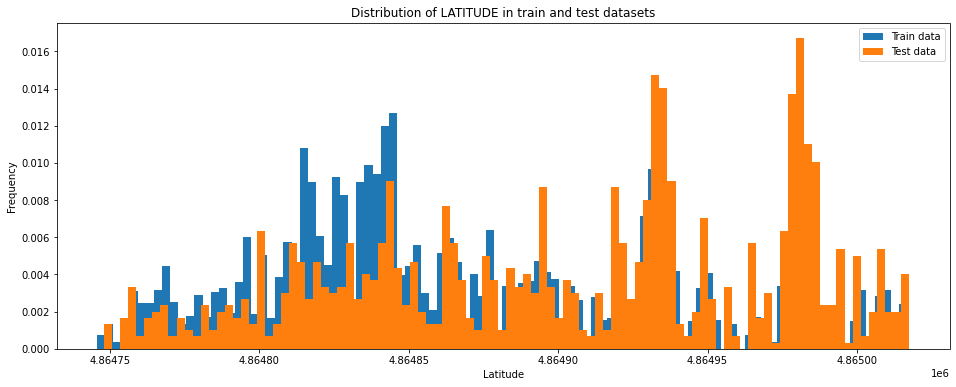

In [23]:
# Distribución de los valores de "LATITUDE"
plt.figure(figsize=(16, 6))
plt.hist(df_train['LATITUDE'], density=True, stacked=True, label="Train data", bins=100)
plt.hist(df_test['LATITUDE'], density=True, stacked=True, label="Test data", bins=100)
plt.gca().set(title="Distribution of LATITUDE in train and test datasets", xlabel="Latitude", ylabel="Frequency")
plt.legend()

### Análisis conjunto de las variables 'LONGITUDE' y 'LATITUDE' (2D)

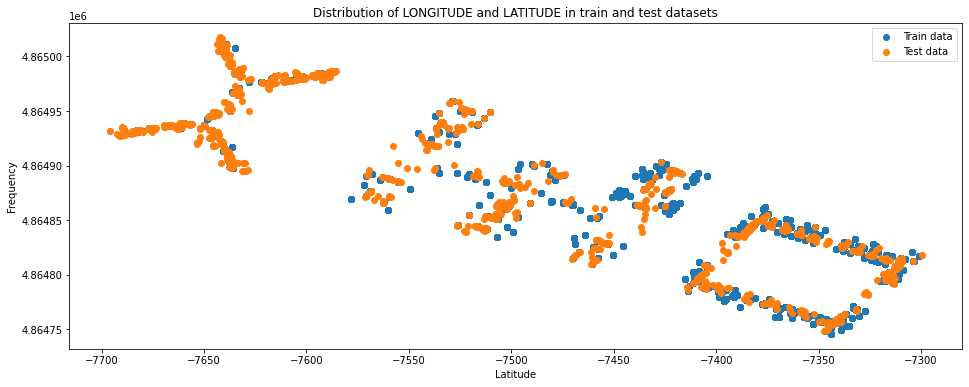

In [24]:
# Distribución de los valores de "LONGITUDE" y "LATITUDE"
plt.figure(figsize=(16, 6))
plt.scatter(x=df_train['LONGITUDE'], y=df_train['LATITUDE'], label="Train data")
plt.scatter(x=df_test['LONGITUDE'], y=df_test['LATITUDE'], label="Test data")
plt.gca().set(title="Distribution of LONGITUDE and LATITUDE in train and test datasets", xlabel="Latitude", ylabel="Frequency")
plt.legend()

### Análisis conjunto de las variables 'LONGITUDE', 'LATITUDE' y 'FLOOR' (3D)

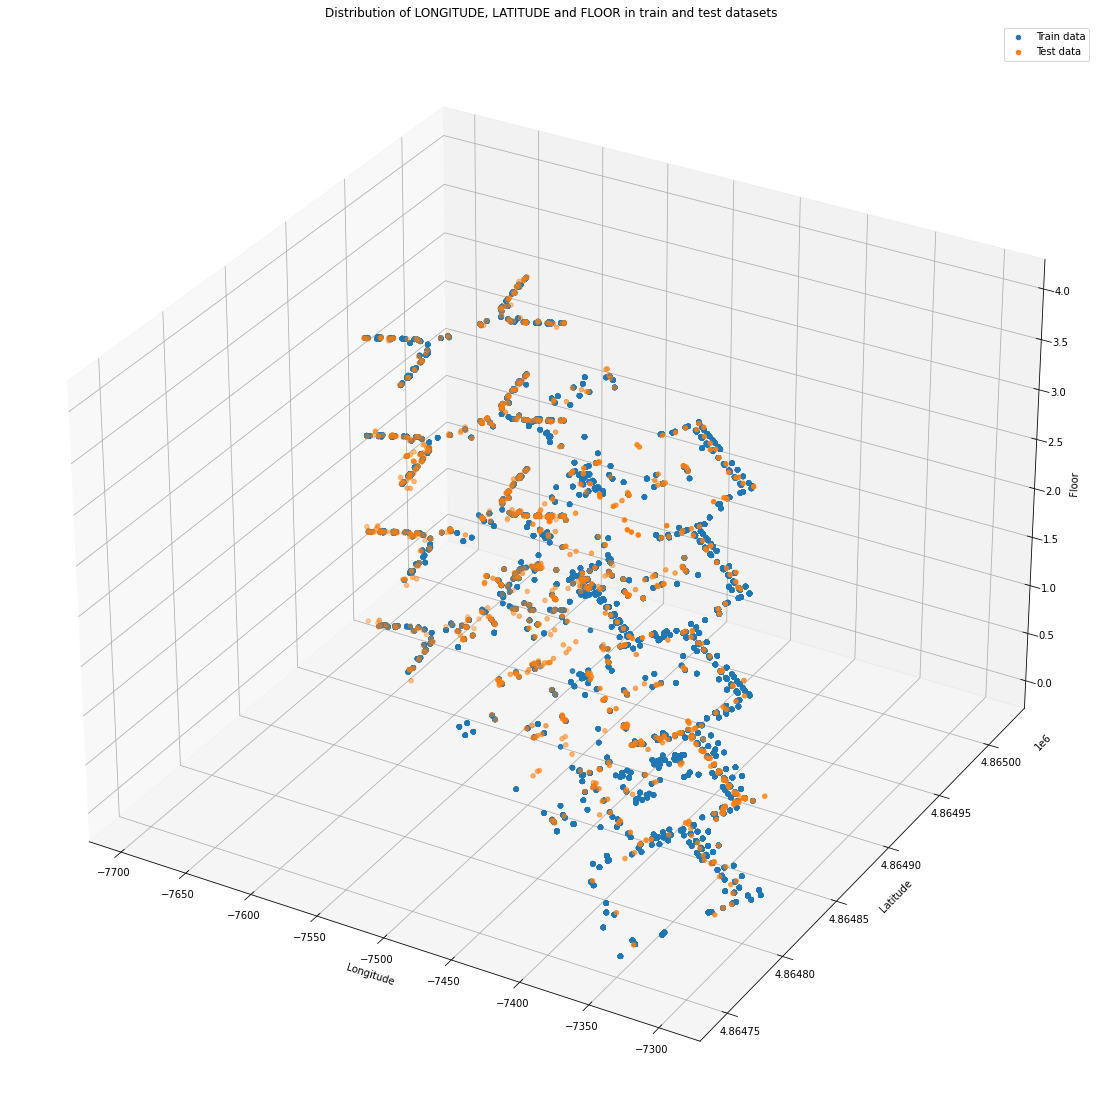

In [25]:
# Distribución de los valores de "LONGITUDE" y "LATITUDE"
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=df_train['LONGITUDE'], ys=df_train['LATITUDE'], zs=df_train['FLOOR'], label="Train data")
ax.scatter(xs=df_test['LONGITUDE'], ys=df_test['LATITUDE'], zs=df_test['FLOOR'], label="Test data")

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Floor')

ax.set(title="Distribution of LONGITUDE, LATITUDE and FLOOR in train and test datasets")
ax.legend()

### Análisis de la variable 'FLOOR'

In [26]:
# Comprobamos los valores únicos de la columna en el dataset de train para confirmar que la información es coherente   
np.sort(df_train['FLOOR'].unique())

array([0, 1, 2, 3, 4], dtype=int64)

In [27]:
# Comprobamos los valores únicos de la columna en el dataset de test para confirmar que la información es coherente   
np.sort(df_test['FLOOR'].unique())

array([0, 1, 2, 3, 4], dtype=int64)

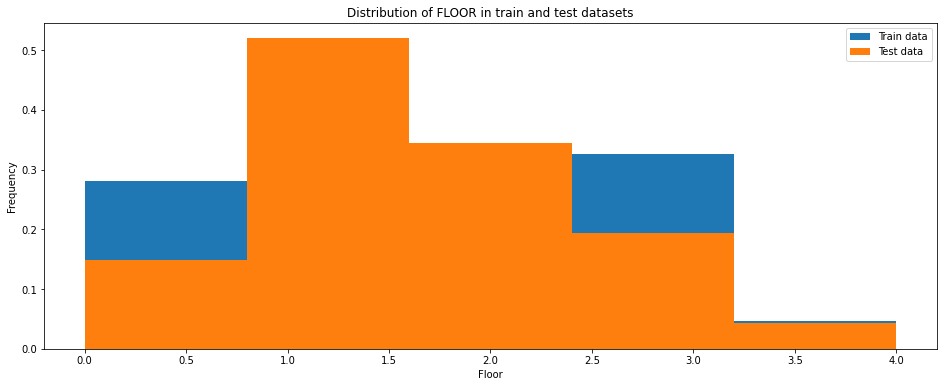

In [28]:
# Distribución de los valores de "FLOOR"
plt.figure(figsize=(16, 6))
plt.hist(df_train['FLOOR'], density=True, stacked=True, label="Train data", bins=5)
plt.hist(df_test['FLOOR'], density=True, stacked=True, label="Test data", bins=5)
plt.gca().set(title="Distribution of FLOOR in train and test datasets", xlabel="Floor", ylabel="Frequency")
plt.legend()

### Análisis de la variable 'BUILDINGID'

In [29]:
# Comprobamos los valores únicos de la columna en el dataset de train para confirmar que la información es coherente  
np.sort(df_train['BUILDINGID'].unique())

array([0, 1, 2], dtype=int64)

In [30]:
# Comprobamos los valores únicos de la columna en el dataset de test para confirmar que la información es coherente  
np.sort(df_train['BUILDINGID'].unique())

array([0, 1, 2], dtype=int64)

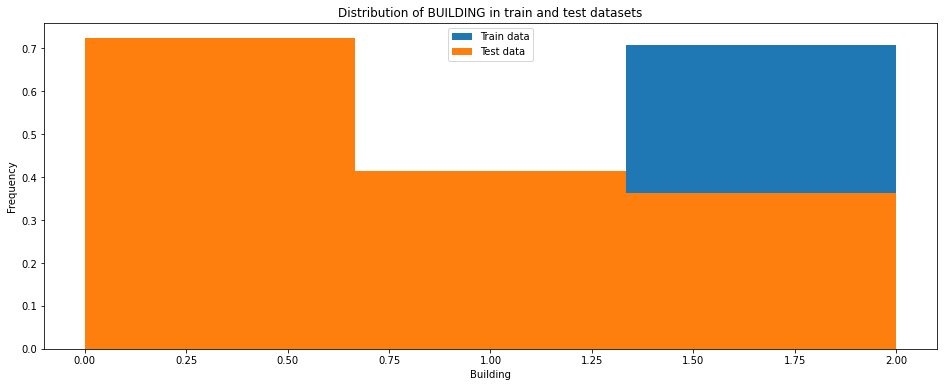

In [31]:
# Distribución de los valores de "FLOOR"
plt.figure(figsize=(16, 6))
plt.hist(df_train['BUILDINGID'], density=True, stacked=True, label="Train data", bins=3)
plt.hist(df_test['BUILDINGID'], density=True, stacked=True, label="Test data", bins=3)
plt.gca().set(title="Distribution of BUILDING in train and test datasets", xlabel="Building", ylabel="Frequency")
plt.legend()

###### Conclusiones

Como se puede comprobar en las gráficas anteriores, los datos de train y test no están uniformemente distribuidos. Por lo tanto, se ha tomado la decisión de juntarlos en un único dataset y volver a separarlos de forma aleatoria.

### Unir y volver a separar los datos de train y test

In [32]:
# Junta los datos de train y test en un único dataset y resetea el índice
df = pd.concat([df_train, df_test])
df.reset_index(drop=True, inplace=True)

In [33]:
# Vuelve a separar los datos de train y test de forma aleatoria
df_train, df_test = train_test_split(df, test_size = .30, random_state = 123)

### Análisis conjunto de las variables 'LONGITUDE' y 'LATITUDE' (2D)

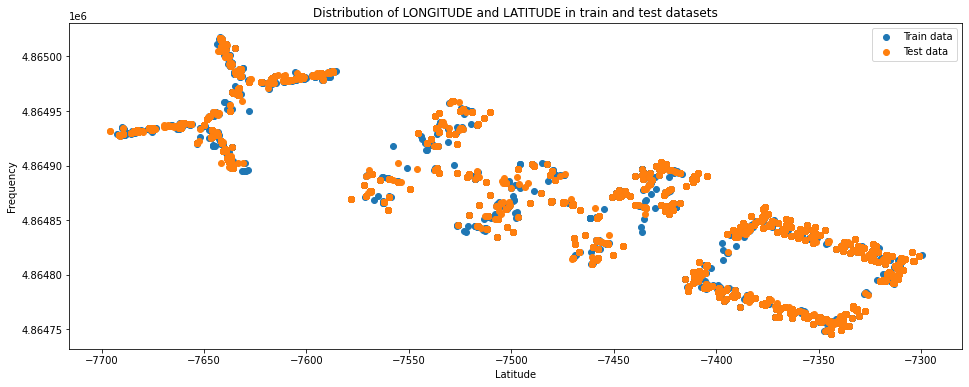

In [34]:
# Distribución de los valores de "LONGITUDE" y "LATITUDE"
plt.figure(figsize=(16, 6))
plt.scatter(x=df_train['LONGITUDE'], y=df_train['LATITUDE'], label="Train data")
plt.scatter(x=df_test['LONGITUDE'], y=df_test['LATITUDE'], label="Test data")
plt.gca().set(title="Distribution of LONGITUDE and LATITUDE in train and test datasets", xlabel="Latitude", ylabel="Frequency")
plt.legend()

### Análisis conjunto de las variables 'LONGITUDE', 'LATITUDE' y 'FLOOR' (3D)

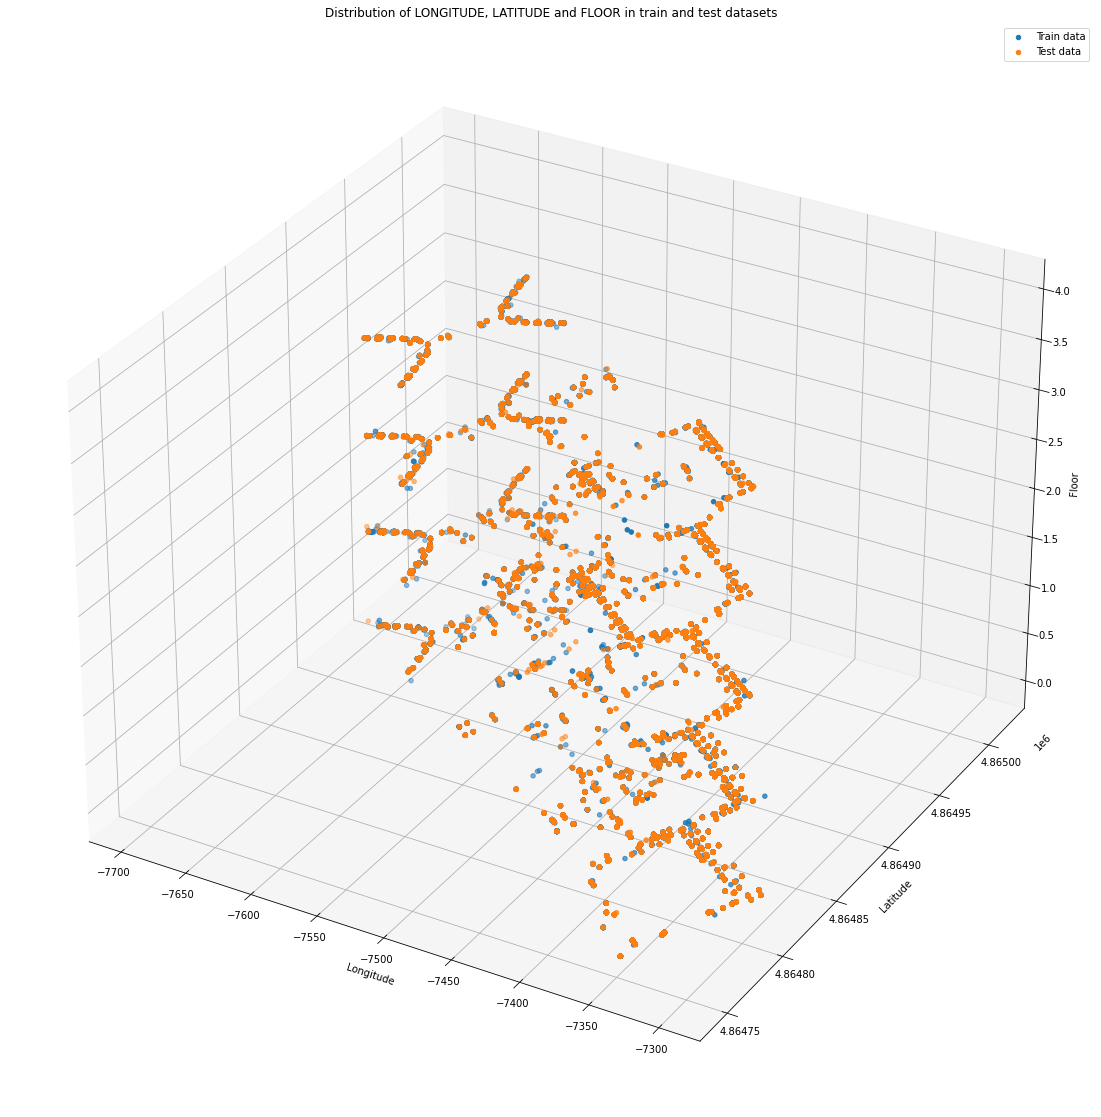

In [35]:
# Distribución de los valores de "LONGITUDE" y "LATITUDE"
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=df_train['LONGITUDE'], ys=df_train['LATITUDE'], zs=df_train['FLOOR'], label="Train data")
ax.scatter(xs=df_test['LONGITUDE'], ys=df_test['LATITUDE'], zs=df_test['FLOOR'], label="Test data")

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Floor')

ax.set(title="Distribution of LONGITUDE, LATITUDE and FLOOR in train and test datasets")
ax.legend()

###### Conclusiones

Como se puede comprobar en las gráficas anteriores, al separar de forma aleatoria los datos de train y test la nueva distribucion está más balanceada.

# Limpieza y ajuste de los datos

### Análisis de outliers

En cuanto a los outliers, se definirán como error (valor 100) las señales que no estén entre -80dB y -30dB.

In [36]:
# Definimos como outlier las señales que no estén entre -80dB y -30dB
df.iloc[:, 0:520] = df.iloc[:, 0:520].mask(df <= -80, 100)
df.iloc[:, 0:520] = df.iloc[:, 0:520].mask(df >= -30, 100)

### Eliminar WAPS (columnas) y observaciones (filas) cuyos valores sean siempre 100 (señal no detectada)

In [37]:
# Obtiene el número de valores únicos en las columnas correspondientes a WAPs
nunique = df.iloc[:, 0:520].nunique()

# Comprueba que hay 166 columnas (WAPs) que en todos sus valores han detectado señal errónea
(nunique==1).sum()

166

In [38]:
# Elimina esas columnas del dataframe
df = df.drop(nunique[nunique == 1].index, axis=1)

In [39]:
# Obtiene el número de valores únicos en las filas correspondientes a valores de los WAPs
nunique = df.iloc[:, 0:len(df.columns)-9].nunique(axis=1)

# Comprueba que hay 755 filas donde todos los WAPs han detectado señal errónea
(nunique==1).sum()

755

In [40]:
# Elimina esas filas del dataframe y resetea el índice
df = df.drop(nunique[nunique == 1].index, axis=0)
df.reset_index(drop=True, inplace=True)

### Eliminar WAPS (columnas) y observaciones (filas) que tangan poca varianza

In [41]:
# Calcula la varianza de las columnas correspondientes a los WAPs
variance = df.iloc[:, 0:len(df.columns)-9].var()

In [42]:
# Almacena las columnas con varianza mayor a 5
var_columns = []
columns = df.columns

for i in range(0,len(variance)):
    if variance[i]<=5: 
        var_columns.append(i)
        
#Comprueba que hay 26 columnas con poca varianza
len(var_columns)

26

In [43]:
# Elimina esas columnas del dataframe
df = df.drop(df.iloc[:, var_columns], axis=1)

In [44]:
# Calcula la varianza de las filas correspondientes a valores de los WAPs
variance = df.iloc[:, 0:len(df.columns)-9].var(axis=1)

In [45]:
# Como el menor valor de varianza es considerable, no elimina ninguna fila
min(variance)

58.90548780487802

### Convertir valores de los WAP (columnas) a escala lineal positiva

In [46]:
# Utiliza la siguiente expresión para pasar los valores de señal (db) a escala positiva: quality = 2 * (db + 100)
df.iloc[:, 0:len(df.columns)-9] = df.iloc[:, 0:len(df.columns)-9].apply(lambda x: (x+100)*2)

In [47]:
# Finalmente, pasa a 0 los valores 400 (antes de pasar a escala positiva tenían un valor de 100, señal no detectada)
df.iloc[:, 0:len(df.columns)-9] = df.iloc[:, 0:len(df.columns)-9].replace(400, 0)

### Normalizar valores de los WAP (columnas)

In [48]:
# Normaliza los valores de las columnas correspondientes a los WAP (los deja en un rango entre 0 y 1)
df.iloc[:, 0:len(df.columns)-9] = normalize(df.iloc[:, 0:len(df.columns)-9])

# Feature Engineering

### PCA (Principal Component Analysis) sobre los WAP (columnas)

In [49]:
# Aplica PCA sobre las columnas basándose en la varianza acumulada 
X = df.iloc[:, 0:len(df.columns)-9]
pca = PCA(.98)
pca.fit(X)
X_pca = pca.transform(X)

In [50]:
# Almacena las columnas resultantes en un nuevo dataframe
df_X = pd.DataFrame(X_pca)

# Modelos de predicción

### Predicción de la variable BUILDING mediante algoritmos de clasificación

Para este análisis, dado que se trata de predecir el edificio (valores del 0 al 2), se van a comparar los algoritmos de clasificación Random Forest, K-Nearest Neighbors (KNN) y Support Vector Machines (SVM) para intentar predecir 'BUILDING' en función del resto de variables.

El rendimiento de los modelos definidos se medirá en base al valor de 'accuracy' que presenten.

In [51]:
# Separa en los datos en Train/Test
x = df_X
y = df['BUILDINGID']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify = y)

#### Random Forest Classifier para predecir Building

In [52]:
# Clasificación (entrenar al modelo con datos de train)
algo = RandomForestClassifier()
model = algo.fit(x_train, y_train)
 
# Aplica el modelo a los datos de test
preds = model.predict(x_test)
print("\n- Train/Test split method report:\n")
print(metrics.classification_report(y_test, preds))
RFscore_pred = metrics.accuracy_score(y_test, preds)
print("- Train/Test split Accuracy:", RFscore_pred)

# Cross validation
scores = cross_val_score(algo, x_train, y_train, cv=5, scoring="accuracy")
print("\n- Cross Validation Accuracy:", scores.mean())


- Train/Test split method report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1732
           1       1.00      1.00      1.00      1419
           2       1.00      1.00      1.00      2746

    accuracy                           1.00      5897
   macro avg       1.00      1.00      1.00      5897
weighted avg       1.00      1.00      1.00      5897

- Train/Test split Accuracy: 0.9994912667458029

- Cross Validation Accuracy: 0.9995639006534622


#### KNN Classifier para predecir Building

In [53]:
# Clasificación (entrenar al modelo con datos de train)
algo = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model = algo.fit(x_train, y_train)
 
# Aplica el modelo a los datos de test
preds = model.predict(x_test)

print("\n- Train/Test split method report:\n")
print(metrics.classification_report(y_test, preds))
KNNscore_pred = metrics.accuracy_score(y_test, preds)
print("- Train/Test split Accuracy:", KNNscore_pred)

# Cross validation
scores = cross_val_score(algo, x_train, y_train, cv=5, scoring="accuracy")
print("\n- Cross Validation Accuracy:", scores.mean())


- Train/Test split method report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1732
           1       1.00      1.00      1.00      1419
           2       1.00      1.00      1.00      2746

    accuracy                           1.00      5897
   macro avg       1.00      1.00      1.00      5897
weighted avg       1.00      1.00      1.00      5897

- Train/Test split Accuracy: 0.999152111243005

- Cross Validation Accuracy: 0.9995638742360071


#### SVM Classifier para predecir Building

In [54]:
# Clasificación (entrenar al modelo con datos de train)
algo = SVC()
model = algo.fit(x_train, y_train)
 
# Aplica el modelo a los datos de test
preds = model.predict(x_test)

print("\n- Train/Test split method report:\n")
print(metrics.classification_report(y_test, preds))
SVMscore_pred = metrics.accuracy_score(y_test, preds)
print("- Train/Test split Accuracy:", SVMscore_pred)

# Cross validation
scores = cross_val_score(algo, x_train, y_train, cv=5, scoring="accuracy")
print("\n- Cross Validation Accuracy:", scores.mean())


- Train/Test split method report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1732
           1       1.00      1.00      1.00      1419
           2       1.00      1.00      1.00      2746

    accuracy                           1.00      5897
   macro avg       1.00      1.00      1.00      5897
weighted avg       1.00      1.00      1.00      5897

- Train/Test split Accuracy: 0.999152111243005

- Cross Validation Accuracy: 0.9997092230732164


In [55]:
# Crea una tabla resumen con los datos utilizados por cada modelo y sus resultados
dataBuilding = {'Target': ['BUILDING', 'BUILDING', 'BUILDING'],
        'Model': ['Random Forest Classifier', 'KNN Classifier', 'SVM Classifier'],
        'Accuracy':[RFscore_pred, KNNscore_pred, SVMscore_pred]
       }

resultsBuilding = pd.DataFrame(dataBuilding)

# Formato de la tabla
resultsBuilding = resultsBuilding.style.hide_index().set_properties(
    **{'color': 'black !important',
       'background-color': 'white',
       'border': '1px black solid !important'}
).set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px black solid !important'),('background-color', '#D3D3D3'), ('text-align', 'center')]},
    {
        'selector': 'td',
        'props': [('text-align', 'center')]}
])

resultsBuilding

Target,Model,Accuracy
BUILDING,Random Forest Classifier,0.999491
BUILDING,KNN Classifier,0.999152
BUILDING,SVM Classifier,0.999152


### Predicción de la variable FLOOR mediante algoritmos de clasificación

Para este análisis, dado que se trata de predecir el piso (valores del 0 al 4), se van a comparar los algoritmos de clasificación Random Forest, K-Nearest Neighbors (KNN) y Support Vector Machines (SVM) para intentar predecir 'FLOOR' en función del resto de variables.

El rendimiento de los modelos definidos se medirá en base al valor de 'accuracy' que presenten.

In [56]:
# Separa en los datos en Train/Test
x = df_X
y = df['FLOOR']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify = y)

#### Random Forest Classifier para predecir Floor

In [57]:
# Clasificación (entrenar al modelo con datos de train)
algo = RandomForestClassifier()
model = algo.fit(x_train, y_train)
 
# Aplica el modelo a los datos de test
preds = model.predict(x_test)
print("\n- Train/Test split method report:\n")
print(metrics.classification_report(y_test, preds))
RFscore_pred = metrics.accuracy_score(y_test, preds)
print("- Train/Test split Accuracy:", RFscore_pred)

# Cross validation
scores = cross_val_score(algo, x_train, y_train, cv=5, scoring="accuracy")
print("\n- Cross Validation Accuracy:", scores.mean())


- Train/Test split method report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1291
           1       0.99      0.98      0.99      1552
           2       0.98      0.98      0.98      1349
           3       0.99      1.00      0.99      1476
           4       0.99      0.98      0.99       229

    accuracy                           0.99      5897
   macro avg       0.99      0.99      0.99      5897
weighted avg       0.99      0.99      0.99      5897

- Train/Test split Accuracy: 0.9884687129048669

- Cross Validation Accuracy: 0.9893159886891025


#### KNN Classifier para predecir Floor

In [58]:
# Clasificación (entrenar al modelo con datos de train)
algo = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model = algo.fit(x_train, y_train)
 
# Aplica el modelo a los datos de test
preds = model.predict(x_test)

print("\n- Train/Test split method report:\n")
print(metrics.classification_report(y_test, preds))
KNNscore_pred = metrics.accuracy_score(y_test, preds)
print("- Train/Test split Accuracy:", KNNscore_pred)

# Cross validation
scores = cross_val_score(algo, x_train, y_train, cv=5, scoring="accuracy")
print("\n- Cross Validation Accuracy:", scores.mean())


- Train/Test split method report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1291
           1       0.99      0.98      0.98      1552
           2       0.98      0.99      0.98      1349
           3       0.99      1.00      0.99      1476
           4       1.00      0.99      0.99       229

    accuracy                           0.99      5897
   macro avg       0.99      0.99      0.99      5897
weighted avg       0.99      0.99      0.99      5897

- Train/Test split Accuracy: 0.9879599796506698

- Cross Validation Accuracy: 0.989170692686803


#### SVM Classifier para predecir Floor

In [59]:
# Clasificación (entrenar al modelo con datos de train)
algo = SVC()
model = algo.fit(x_train, y_train)
 
# Aplica el modelo a los datos de test
preds = model.predict(x_test)

print("\n- Train/Test split method report:\n")
print(metrics.classification_report(y_test, preds))
SVMscore_pred = metrics.accuracy_score(y_test, preds)
print("- Train/Test split Accuracy:", SVMscore_pred)

# Cross validation
scores = cross_val_score(algo, x_train, y_train, cv=5, scoring="accuracy")
print("\n- Cross Validation Accuracy:", scores.mean())


- Train/Test split method report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1291
           1       0.99      0.99      0.99      1552
           2       0.99      0.99      0.99      1349
           3       1.00      1.00      1.00      1476
           4       1.00      0.99      0.99       229

    accuracy                           0.99      5897
   macro avg       0.99      0.99      0.99      5897
weighted avg       0.99      0.99      0.99      5897

- Train/Test split Accuracy: 0.98965575716466

- Cross Validation Accuracy: 0.9902609410531478


In [60]:
# Crea una tabla resumen con los datos utilizados por cada modelo y sus resultados
dataFloor = {'Target': ['FLOOR', 'FLOOR', 'FLOOR'],
        'Model': ['Random Forest Classifier', 'KNN Classifier', 'SVM Classifier'],
        'Accuracy':[RFscore_pred, KNNscore_pred, SVMscore_pred]
       }

resultsFloor = pd.DataFrame(dataFloor)

# Formato de la tabla
resultsFloor = resultsFloor.style.hide_index().set_properties(
    **{'color': 'black !important',
       'background-color': 'white',
       'border': '1px black solid !important'}
).set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px black solid !important'),('background-color', '#D3D3D3'), ('text-align', 'center')]},
    {
        'selector': 'td',
        'props': [('text-align', 'center')]}
])

resultsFloor

Target,Model,Accuracy
FLOOR,Random Forest Classifier,0.988469
FLOOR,KNN Classifier,0.987960
FLOOR,SVM Classifier,0.989656


### Predicción de la variable LATITUDE mediante algoritmos de regresión

Para este análisis, dado que se trata de predecir la latitud, se van a comparar los algoritmos de regresión Random Forest, K-Nearest Neighbors (KNN) y Support Vector Machines (SVM) para intentar predecir 'LATITUDE' en función del resto de variables.

El rendimiento de los modelos definidos se medirá en base al valor de 'Root Mean Squared Error (RMSE)' que presenten.

In [61]:
# Separa en los datos en Train/Test
x = df_X
y = df['LATITUDE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

#### Random Forest Regressor para predecir Latitude

In [62]:
# Regresión (entrenar al modelo con datos de train)
algo = RandomForestRegressor()
model = algo.fit(x_train, y_train)

# Aplica el modelo a los datos de test
preds = model.predict(x_test)

print("Train/Test split R2:", metrics.r2_score(y_test, preds))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))  
RFRMSE = np.sqrt(metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', RFRMSE)

Train/Test split R2: 0.9918841644998215
Mean Absolute Error: 3.1841102254000373
Mean Squared Error: 37.831436551564856
Root Mean Squared Error: 6.150726505996252


#### KNN Regressor para predecir Latitude

In [63]:
rmse_val = [] 

# Realiza predicciones con el algroritmo KNN probando diferentes valores de K
for K in range(15):
    K = K+1
    algo = KNeighborsRegressor(n_neighbors = K)
    model = algo.fit(x_train, y_train)  
    preds = model.predict(x_test) 
    error = sqrt(metrics.mean_squared_error(y_test,preds)) 
    rmse_val.append(error) 
    print('RMSE value for k =' , K , 'is:', error)

RMSE value for k = 1 is: 8.106028658846993
RMSE value for k = 2 is: 5.877680280228057
RMSE value for k = 3 is: 5.777201496463203
RMSE value for k = 4 is: 5.743150587097164
RMSE value for k = 5 is: 5.756736788093467
RMSE value for k = 6 is: 5.867115124830136
RMSE value for k = 7 is: 5.930755783754314
RMSE value for k = 8 is: 5.891387532207657
RMSE value for k = 9 is: 5.940355554255235
RMSE value for k = 10 is: 5.965730905232312
RMSE value for k = 11 is: 6.031682024611473
RMSE value for k = 12 is: 6.095956774477791
RMSE value for k = 13 is: 6.161840008057058
RMSE value for k = 14 is: 6.193958129606195
RMSE value for k = 15 is: 6.236383937775269


In [64]:
# Se queda con el mejor valor de K (el valor en el que RMSE deja de decrecer)
K = 4
algo = KNeighborsRegressor(n_neighbors = K)
model = algo.fit(x_train, y_train)  
preds = model.predict(x_test) 

print("Train/Test split R2:", metrics.r2_score(y_test, preds))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
KNNRMSE = np.sqrt(metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', KNNRMSE)

Train/Test split R2: 0.992924114275616
Mean Absolute Error: 2.849641004136966
Mean Squared Error: 32.9837786660745
Root Mean Squared Error: 5.743150587097164


#### SVM Regressor para predecir Latitude

In [65]:
# Regresión (entrenar al modelo con datos de train)
algo = SVR()
model = algo.fit(x_train, y_train)

# Aplica el modelo a los datos de test
preds = model.predict(x_test)

print("Train/Test split R2:", metrics.r2_score(y_test, preds))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
SVMRMSE = np.sqrt(metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', SVMRMSE)

Train/Test split R2: 0.965355399379907
Mean Absolute Error: 8.015921920920459
Mean Squared Error: 161.4935406446478
Root Mean Squared Error: 12.708010884660423


In [66]:
# Crea una tabla resumen con los datos utilizados por cada modelo y sus resultados
dataLatitude = {'Target': ['LATITUDE', 'LATITUDE', 'LATITUDE'],
        'Model': ['Random Forest Regressor', 'KNN Regressor', 'SVM Regressor'],
        'Accuracy':[RFRMSE, KNNRMSE, SVMRMSE]
       }

resultsLatitude = pd.DataFrame(dataLatitude)

# Formato de la tabla
resultsLatitude = resultsLatitude.style.hide_index().set_properties(
    **{'color': 'black !important',
       'background-color': 'white',
       'border': '1px black solid !important'}
).set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px black solid !important'),('background-color', '#D3D3D3'), ('text-align', 'center')]},
    {
        'selector': 'td',
        'props': [('text-align', 'center')]}
])

resultsLatitude

Target,Model,Accuracy
LATITUDE,Random Forest Regressor,6.150727
LATITUDE,KNN Regressor,5.743151
LATITUDE,SVM Regressor,12.708011


### Predicción de la variable LONGITUDE mediante algoritmos de regresión

Para este análisis, dado que se trata de predecir la longitud, se van a comparar los algoritmos de regresión Random Forest, K-Nearest Neighbors (KNN) y Support Vector Machines (SVM) para intentar predecir 'LONGITUDE' en función del resto de variables.

El rendimiento de los modelos definidos se medirá en base al valor de 'Root Mean Squared Error (RMSE)' que presenten.

In [67]:
# Separa en los datos en Train/Test
x = df_X
y = df['LONGITUDE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

#### Random Forest Regressor para predecir Longitude

In [68]:
# Regresión (entrenar al modelo con datos de train)
algo = RandomForestRegressor()
model = algo.fit(x_train, y_train)

# Aplica el modelo a los datos de test
preds = model.predict(x_test)

print("Train/Test split R2:", metrics.r2_score(y_test, preds))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))  
RFRMSE = np.sqrt(metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', RFRMSE)

Train/Test split R2: 0.9965592321904577
Mean Absolute Error: 3.57369399741178
Mean Squared Error: 54.04439339651397
Root Mean Squared Error: 7.351489195837396


#### KNN Regressor para predecir Longitude

In [69]:
rmse_val = [] 

# Realiza predicciones con el algroritmo KNN probando diferentes valores de K
for K in range(15):
    K = K+1
    algo = KNeighborsRegressor(n_neighbors = K)
    model = algo.fit(x_train, y_train)  
    preds = model.predict(x_test) 
    error = sqrt(metrics.mean_squared_error(y_test,preds)) 
    rmse_val.append(error) 
    print('RMSE value for k =' , K , 'is:', error)

RMSE value for k = 1 is: 10.142683805110194
RMSE value for k = 2 is: 7.231217427373957
RMSE value for k = 3 is: 7.140151917272316
RMSE value for k = 4 is: 7.061021420056416
RMSE value for k = 5 is: 7.131003014353557
RMSE value for k = 6 is: 7.2373121201670445
RMSE value for k = 7 is: 7.353019871407974
RMSE value for k = 8 is: 7.292017311115132
RMSE value for k = 9 is: 7.363636026100978
RMSE value for k = 10 is: 7.340288307755731
RMSE value for k = 11 is: 7.37600206884909
RMSE value for k = 12 is: 7.435483349337747
RMSE value for k = 13 is: 7.499175110434045
RMSE value for k = 14 is: 7.533707231085048
RMSE value for k = 15 is: 7.588925003248176


In [70]:
# Se queda con el mejor valor de K (el valor en el que RMSE deja de decrecer)
K = 4
algo = KNeighborsRegressor(n_neighbors = K)
model = algo.fit(x_train, y_train)  
preds = model.predict(x_test) 

print("Train/Test split R2:", metrics.r2_score(y_test, preds))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
KNNRMSE = np.sqrt(metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', KNNRMSE)

Train/Test split R2: 0.9968257598706192
Mean Absolute Error: 3.2331238051150017
Mean Squared Error: 49.85802349449553
Root Mean Squared Error: 7.061021420056416


#### SVM Regressor para predecir Longitude

In [71]:
# Regresión (entrenar al modelo con datos de train)
algo = SVR(kernel='rbf')
model = algo.fit(x_train, y_train)

# Aplica el modelo a los datos de test
preds = model.predict(x_test)

print("Train/Test split R2:", metrics.r2_score(y_test, preds))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
SVMRMSE = np.sqrt(metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', SVMRMSE)

Train/Test split R2: 0.961171559074352
Mean Absolute Error: 15.551741114743924
Mean Squared Error: 609.8811813280089
Root Mean Squared Error: 24.695772539607034


In [72]:
# Crea una tabla resumen con los datos utilizados por cada modelo y sus resultados
dataLongitude = {'Target': ['LONGITUDE', 'LONGITUDE', 'LONGITUDE'],
        'Model': ['Random Forest Regressor', 'KNN Regressor', 'SVM Regressor'],
        'Accuracy':[RFRMSE, KNNRMSE, SVMRMSE]
       }

resultsLongitude = pd.DataFrame(dataLongitude)

# Formato de la tabla
resultsLongitude = resultsLongitude.style.hide_index().set_properties(
    **{'color': 'black !important',
       'background-color': 'white',
       'border': '1px black solid !important'}
).set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px black solid !important'),('background-color', '#D3D3D3'), ('text-align', 'center')]},
    {
        'selector': 'td',
        'props': [('text-align', 'center')]}
])

resultsLongitude

Target,Model,Accuracy
LONGITUDE,Random Forest Regressor,7.351489
LONGITUDE,KNN Regressor,7.061021
LONGITUDE,SVM Regressor,24.695773


# Conclusiones

#### Predicción de BUILDING

In [73]:
resultsBuilding

Target,Model,Accuracy
BUILDING,Random Forest Classifier,0.999491
BUILDING,KNN Classifier,0.999152
BUILDING,SVM Classifier,0.999152


Como se puede comprobar en la tabla anterior, cualquiera de los tres modelos es bueno, aunque RF da un accuracy ligeramente mayor.

#### Predicción de FLOOR

In [74]:
resultsFloor

Target,Model,Accuracy
FLOOR,Random Forest Classifier,0.988469
FLOOR,KNN Classifier,0.987960
FLOOR,SVM Classifier,0.989656


Como se puede comprobar en la tabla anterior, cualquiera de los tres modelos es bueno, aunque SVM da un accuracy ligeramente mayor.

#### Predicción de LATITUDE

In [75]:
resultsLatitude

Target,Model,Accuracy
LATITUDE,Random Forest Regressor,6.150727
LATITUDE,KNN Regressor,5.743151
LATITUDE,SVM Regressor,12.708011


Como se puede comprobar en la tabla anterior, el mejor modelo para predecir Latitude es el regresor KNN.

#### Predicción de LONGITUDE

In [76]:
resultsLongitude

Target,Model,Accuracy
LONGITUDE,Random Forest Regressor,7.351489
LONGITUDE,KNN Regressor,7.061021
LONGITUDE,SVM Regressor,24.695773


Como se puede comprobar en la tabla anterior, el mejor modelo para predecir Longitude es el regresor KNN.